In [1]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')



Mounted at /content/drive/


In [3]:
import os

In [4]:
SOURCE = '/content/drive/MyDrive/CAPSTONE-ML/DATA SETTT/data-qr' #TEMPAT DATASET KITAAAA
print(len(os.listdir(SOURCE)))

3140


In [5]:
#Split dataset to train and test
import random # untuk mengacak dataset(jika membutuhkan acak)
from shutil import copyfile

#Buat folder untuk train dan test
train = os.mkdir('/content/TRAIN')
validation = os.mkdir('/content/VALIDATION')
test = os.mkdir('/content/TEST')

files = []
SPLIT_SIZE = 0.8 #perbandingan train-validation-test adalah 8:1:1

SOURCE = '/content/drive/MyDrive/CAPSTONE-ML/DATA SETTT/data-qr/'
TRAIN = '/content/TRAIN/'
VALIDATION = '/content/VALIDATION/'
TEST = '/content/TEST/'


for filename in os.listdir(SOURCE):
  files.append(filename)
files = sorted(files)
training_length = int(len(files) * SPLIT_SIZE) #panjang dari training
validation_length = int((len(files) - training_length)/2) # panjang dari validation
testing_length = int((len(files) - training_length)/2) #panjang dari test

#shuffled_set = random.sample(files, len(files))

training_set = files[:training_length]
validation_set = files[training_length:training_length+validation_length]
testing_set = files[training_length+validation_length:]


for filename in training_set:
  this_file = SOURCE + filename
  destination = TRAIN + filename
  copyfile(this_file, destination)

for filename in validation_set:
  this_file = SOURCE + filename
  destination = VALIDATION + filename
  copyfile(this_file, destination)

for filename in testing_set:
  this_file = SOURCE + filename
  destination = TEST + filename
  copyfile(this_file, destination)



In [6]:
#Cek size dari masing masing folder
print('\nTRAIN :\n')
print(len(os.listdir(TRAIN)))
#for i in os.listdir(TRAIN):
 # print(i)

print('\nVALIDATION :\n')
print(len(os.listdir(VALIDATION)))
#for i in os.listdir(VALIDATION):
#  print(i)

print('\nTEST :\n')
print(len(os.listdir(TEST)))

#for i in os.listdir(TEST):
#  print(i)




TRAIN :

2512

VALIDATION :

314

TEST :

314


In [7]:
!pip install -q tflite-model-maker
!pip install -q pycocotools
!pip install -q tflite-support

     |████████████████████████████████| 642 kB 31.5 MB/s 
     |████████████████████████████████| 42.5 MB 1.2 MB/s 
     |████████████████████████████████| 120 kB 74.0 MB/s 
     |████████████████████████████████| 1.1 MB 58.8 MB/s 
     |████████████████████████████████| 1.2 MB 51.4 MB/s 
     |████████████████████████████████| 77 kB 6.4 MB/s 
     |████████████████████████████████| 237 kB 78.8 MB/s 
     |████████████████████████████████| 87 kB 8.1 MB/s 
     |████████████████████████████████| 840 kB 68.2 MB/s 
     |████████████████████████████████| 10.9 MB 60.6 MB/s 
     |████████████████████████████████| 3.4 MB 64.3 MB/s 
     |████████████████████████████████| 596 kB 71.0 MB/s 
     |████████████████████████████████| 6.4 MB 58.5 MB/s 
     |████████████████████████████████| 25.3 MB 1.3 MB/s 
     |████████████████████████████████| 99 kB 10.2 MB/s 
     |████████████████████████████████| 47.8 MB 1.6 MB/s 
     |████████████████████████████████| 352 kB 67.7 MB/s 
     |████████████

In [8]:
#tambahan
!apt-get install libasound-dev portaudio19-dev libportaudio2 libportaudiocpp0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'libasound2-dev' instead of 'libasound-dev'
libasound2-dev is already the newest version (1.1.3-5ubuntu0.6).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 42 not upgraded.
Need to get 184 kB of archives.
After this operation, 891 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudiocpp0 amd64 19.6.0-1 [15.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 portaudio19-dev amd64 19.6.0-1 [104 kB]
Fetched 184 kB in 0s (1,825 kB/s)
Selecting

In [9]:
import numpy as np
import os

from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector

import tensorflow as tf
assert tf.__version__.startswith('2')

tf.get_logger().setLevel('ERROR')
from absl import logging
logging.set_verbosity(logging.ERROR)

In [10]:
spec = model_spec.get('efficientdet_lite2')

In [11]:
train_data = object_detector.DataLoader.from_pascal_voc('/content/TRAIN', '/content/TRAIN', label_map={1: "0"})
validation_data = object_detector.DataLoader.from_pascal_voc('/content/VALIDATION', '/content/VALIDATION', label_map={1: "0"})
test_data = object_detector.DataLoader.from_pascal_voc('/content/TEST', '/content/TEST', label_map={1: "0"})


In [13]:
model = object_detector.create(train_data, model_spec=spec, batch_size=16, train_whole_model=True, validation_data=validation_data)

Epoch 1/50
78/78 [==============================] - 111s 920ms/step - det_loss: 0.9562 - cls_loss: 0.6022 - box_loss: 0.0071 - reg_l2_loss: 0.0759 - loss: 1.0321 - learning_rate: 0.0140 - gradient_norm: 2.0892 - val_det_loss: 0.8166 - val_cls_loss: 0.5134 - val_box_loss: 0.0061 - val_reg_l2_loss: 0.0760 - val_loss: 0.8927
Epoch 2/50
78/78 [==============================] - 70s 902ms/step - det_loss: 0.3264 - cls_loss: 0.2041 - box_loss: 0.0024 - reg_l2_loss: 0.0761 - loss: 0.4026 - learning_rate: 0.0200 - gradient_norm: 2.2000 - val_det_loss: 0.5718 - val_cls_loss: 0.3807 - val_box_loss: 0.0038 - val_reg_l2_loss: 0.0762 - val_loss: 0.6481
Epoch 3/50
78/78 [==============================] - 71s 911ms/step - det_loss: 0.2750 - cls_loss: 0.1830 - box_loss: 0.0018 - reg_l2_loss: 0.0763 - loss: 0.3513 - learning_rate: 0.0199 - gradient_norm: 1.8194 - val_det_loss: 0.5164 - val_cls_loss: 0.3464 - val_box_loss: 0.0034 - val_reg_l2_loss: 0.0764 - val_loss: 0.5928
Epoch 4/50
78/78 [============

In [14]:
model.export(export_dir='.')


In [15]:
model.evaluate_tflite('model.tflite', test_data)

157/157 [==============================] - 1226s 8s/step



{'AP': 0.7800031,
 'AP50': 0.976773,
 'AP75': 0.9148976,
 'AP_/0': 0.7800031,
 'APl': 0.8282608,
 'APm': 0.5590737,
 'APs': 0.22475247,
 'ARl': 0.86030537,
 'ARm': 0.6454545,
 'ARmax1': 0.7866242,
 'ARmax10': 0.8191083,
 'ARmax100': 0.8191083,
 'ARs': 0.425}

In [16]:
pip install opencv-python-headless==4.1.2.30

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 1.2 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.5.64
    Uninstalling opencv-python-headless-4.5.5.64:
      Successfully uninstalled opencv-python-headless-4.5.5.64


In [17]:
#@title Load the trained TFLite model and define some visualization functions

#@markdown This code comes from the TFLite Object Detection [Raspberry Pi sample](https://github.com/tensorflow/examples/tree/master/lite/examples/object_detection/raspberry_pi).

import platform
import json
import cv2

from typing import List, NamedTuple
from tflite_support import metadata


Interpreter = tf.lite.Interpreter
load_delegate = tf.lite.experimental.load_delegate

# pylint: enable=g-import-not-at-top


class ObjectDetectorOptions(NamedTuple):
  """A config to initialize an object detector."""

  enable_edgetpu: bool = False
  """Enable the model to run on EdgeTPU."""

  label_allow_list: List[str] = None
  """The optional allow list of labels."""

  label_deny_list: List[str] = None
  """The optional deny list of labels."""

  max_results: int = -1
  """The maximum number of top-scored detection results to return."""

  num_threads: int = 1
  """The number of CPU threads to be used."""

  score_threshold: float = 0.0
  """The score threshold of detection results to return."""


class Rect(NamedTuple):
  """A rectangle in 2D space."""
  left: float
  top: float
  right: float
  bottom: float


class Category(NamedTuple):
  """A result of a classification task."""
  label: str
  score: float
  index: int


class Detection(NamedTuple):
  """A detected object as the result of an ObjectDetector."""
  bounding_box: Rect
  categories: List[Category]


def edgetpu_lib_name():
  """Returns the library name of EdgeTPU in the current platform."""
  return {
      'Darwin': 'libedgetpu.1.dylib',
      'Linux': 'libedgetpu.so.1',
      'Windows': 'edgetpu.dll',
  }.get(platform.system(), None)


class ObjectDetector:
  """A wrapper class for a TFLite object detection model."""

  _OUTPUT_LOCATION_NAME = 'location'
  _OUTPUT_CATEGORY_NAME = 'category'
  _OUTPUT_SCORE_NAME = 'score'
  _OUTPUT_NUMBER_NAME = 'number of detections'

  def __init__(
      self,
      model_path: str,
      options: ObjectDetectorOptions = ObjectDetectorOptions()
  ) -> None:
    """Initialize a TFLite object detection model.
    Args:
        model_path: Path to the TFLite model.
        options: The config to initialize an object detector. (Optional)
    Raises:
        ValueError: If the TFLite model is invalid.
        OSError: If the current OS isn't supported by EdgeTPU.
    """

    # Load metadata from model.
    displayer = metadata.MetadataDisplayer.with_model_file(model_path)

    # Save model metadata for preprocessing later.
    model_metadata = json.loads(displayer.get_metadata_json())
    process_units = model_metadata['subgraph_metadata'][0]['input_tensor_metadata'][0]['process_units']
    mean = 0.0
    std = 1.0
    for option in process_units:
      if option['options_type'] == 'NormalizationOptions':
        mean = option['options']['mean'][0]
        std = option['options']['std'][0]
    self._mean = mean
    self._std = std

    # Load label list from metadata.
    file_name = displayer.get_packed_associated_file_list()[0]
    label_map_file = displayer.get_associated_file_buffer(file_name).decode()
    label_list = list(filter(lambda x: len(x) > 0, label_map_file.splitlines()))
    self._label_list = label_list

    # Initialize TFLite model.
    if options.enable_edgetpu:
      if edgetpu_lib_name() is None:
        raise OSError("The current OS isn't supported by Coral EdgeTPU.")
      interpreter = Interpreter(
          model_path=model_path,
          experimental_delegates=[load_delegate(edgetpu_lib_name())],
          num_threads=options.num_threads)
    else:
      interpreter = Interpreter(
          model_path=model_path, num_threads=options.num_threads)

    interpreter.allocate_tensors()
    input_detail = interpreter.get_input_details()[0]

    # From TensorFlow 2.6, the order of the outputs become undefined.
    # Therefore we need to sort the tensor indices of TFLite outputs and to know
    # exactly the meaning of each output tensor. For example, if
    # output indices are [601, 599, 598, 600], tensor names and indices aligned
    # are:
    #   - location: 598
    #   - category: 599
    #   - score: 600
    #   - detection_count: 601
    # because of the op's ports of TFLITE_DETECTION_POST_PROCESS
    # (https://github.com/tensorflow/tensorflow/blob/a4fe268ea084e7d323133ed7b986e0ae259a2bc7/tensorflow/lite/kernels/detection_postprocess.cc#L47-L50).
    sorted_output_indices = sorted(
        [output['index'] for output in interpreter.get_output_details()])
    self._output_indices = {
        self._OUTPUT_LOCATION_NAME: sorted_output_indices[0],
        self._OUTPUT_CATEGORY_NAME: sorted_output_indices[1],
        self._OUTPUT_SCORE_NAME: sorted_output_indices[2],
        self._OUTPUT_NUMBER_NAME: sorted_output_indices[3],
    }

    self._input_size = input_detail['shape'][2], input_detail['shape'][1]
    self._is_quantized_input = input_detail['dtype'] == np.uint8
    self._interpreter = interpreter
    self._options = options

  def detect(self, input_image: np.ndarray) -> List[Detection]:
    """Run detection on an input image.
    Args:
        input_image: A [height, width, 3] RGB image. Note that height and width
          can be anything since the image will be immediately resized according
          to the needs of the model within this function.
    Returns:
        A Person instance.
    """
    image_height, image_width, _ = input_image.shape

    input_tensor = self._preprocess(input_image)

    self._set_input_tensor(input_tensor)
    self._interpreter.invoke()

    # Get all output details
    boxes = self._get_output_tensor(self._OUTPUT_LOCATION_NAME)
    classes = self._get_output_tensor(self._OUTPUT_CATEGORY_NAME)
    scores = self._get_output_tensor(self._OUTPUT_SCORE_NAME)
    count = int(self._get_output_tensor(self._OUTPUT_NUMBER_NAME))

    return self._postprocess(boxes, classes, scores, count, image_width,
                             image_height)

  def _preprocess(self, input_image: np.ndarray) -> np.ndarray:
    """Preprocess the input image as required by the TFLite model."""

    # Resize the input
    input_tensor = cv2.resize(input_image, self._input_size)

    # Normalize the input if it's a float model (aka. not quantized)
    if not self._is_quantized_input:
      input_tensor = (np.float32(input_tensor) - self._mean) / self._std

    # Add batch dimension
    input_tensor = np.expand_dims(input_tensor, axis=0)

    return input_tensor

  def _set_input_tensor(self, image):
    """Sets the input tensor."""
    tensor_index = self._interpreter.get_input_details()[0]['index']
    input_tensor = self._interpreter.tensor(tensor_index)()[0]
    input_tensor[:, :] = image

  def _get_output_tensor(self, name):
    """Returns the output tensor at the given index."""
    output_index = self._output_indices[name]
    tensor = np.squeeze(self._interpreter.get_tensor(output_index))
    return tensor

  def _postprocess(self, boxes: np.ndarray, classes: np.ndarray,
                   scores: np.ndarray, count: int, image_width: int,
                   image_height: int) -> List[Detection]:
    """Post-process the output of TFLite model into a list of Detection objects.
    Args:
        boxes: Bounding boxes of detected objects from the TFLite model.
        classes: Class index of the detected objects from the TFLite model.
        scores: Confidence scores of the detected objects from the TFLite model.
        count: Number of detected objects from the TFLite model.
        image_width: Width of the input image.
        image_height: Height of the input image.
    Returns:
        A list of Detection objects detected by the TFLite model.
    """
    results = []

    # Parse the model output into a list of Detection entities.
    for i in range(count):
      if scores[i] >= self._options.score_threshold:
        y_min, x_min, y_max, x_max = boxes[i]
        bounding_box = Rect(
            top=int(y_min * image_height),
            left=int(x_min * image_width),
            bottom=int(y_max * image_height),
            right=int(x_max * image_width))
        class_id = int(classes[i])
        category = Category(
            score=scores[i],
            label=self._label_list[class_id],  # 0 is reserved for background
            index=class_id)
        result = Detection(bounding_box=bounding_box, categories=[category])
        results.append(result)

    # Sort detection results by score ascending
    sorted_results = sorted(
        results,
        key=lambda detection: detection.categories[0].score,
        reverse=True)

    # Filter out detections in deny list
    filtered_results = sorted_results
    if self._options.label_deny_list is not None:
      filtered_results = list(
          filter(
              lambda detection: detection.categories[0].label not in self.
              _options.label_deny_list, filtered_results))

    # Keep only detections in allow list
    if self._options.label_allow_list is not None:
      filtered_results = list(
          filter(
              lambda detection: detection.categories[0].label in self._options.
              label_allow_list, filtered_results))

    # Only return maximum of max_results detection.
    if self._options.max_results > 0:
      result_count = min(len(filtered_results), self._options.max_results)
      filtered_results = filtered_results[:result_count]

    return filtered_results


_MARGIN = 10  # pixels
_ROW_SIZE = 10  # pixels
_FONT_SIZE = 1
_FONT_THICKNESS = 1
_TEXT_COLOR = (0, 0, 255)  # red


def visualize(
    image: np.ndarray,
    detections: List[Detection],
) -> np.ndarray:
  """Draws bounding boxes on the input image and return it.
  Args:
    image: The input RGB image.
    detections: The list of all "Detection" entities to be visualize.
  Returns:
    Image with bounding boxes.
  """
  for detection in detections:
    # Draw bounding_box
    start_point = detection.bounding_box.left, detection.bounding_box.top
    end_point = detection.bounding_box.right, detection.bounding_box.bottom
    cv2.rectangle(image, start_point, end_point, _TEXT_COLOR, 3)

    # Draw label and score
    category = detection.categories[0]
    class_name = category.label
    probability = round(category.score, 2)
    result_text = class_name + ' (' + str(probability) + ')'
    text_location = (_MARGIN + detection.bounding_box.left,
                     _MARGIN + _ROW_SIZE + detection.bounding_box.top)
    cv2.putText(image, result_text, text_location, cv2.FONT_HERSHEY_PLAIN,
                _FONT_SIZE, _TEXT_COLOR, _FONT_THICKNESS)

  return image

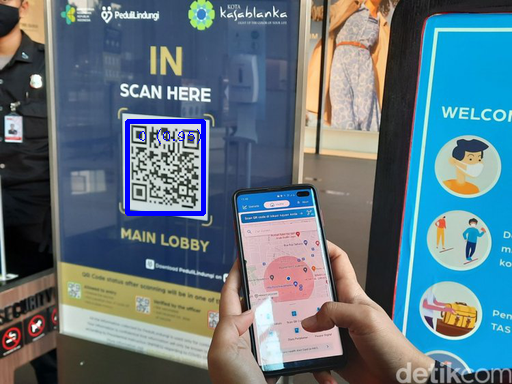

In [28]:
#@title Run object detection and show the detection results

INPUT_IMAGE_URL = "https://baperanews.com/uploads/images/2021/10/image_750x_615fa3fc3d2f9.jpg" #@param {type:"string"}
DETECTION_THRESHOLD = 0.4 #@param {type:"number"}
from PIL import Image
TEMP_FILE = '/tmp/image.png'

!wget -q -O $TEMP_FILE $INPUT_IMAGE_URL
im = Image.open(TEMP_FILE)
im.thumbnail((512, 512), Image.ANTIALIAS)
image_np = np.asarray(im)

# Load the TFLite model
options = ObjectDetectorOptions(
      num_threads=4,
      score_threshold=DETECTION_THRESHOLD,
)
detector = ObjectDetector(model_path='model.tflite', options=options)

# Run object detection estimation using the model.
detections = detector.detect(image_np)

# Draw keypoints and edges on input image
image_np = visualize(image_np, detections)

# Show the detection result
Image.fromarray(image_np)